<a href="https://colab.research.google.com/github/mj0lkpaket/Applied-Deep-Learning-in-physics-and-engineering/blob/main/Exercise_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 4


In [1]:
import numpy as np
import matplotlib.pyplot as plt

**Linear Regression**

The goal of this exercise is to explore a simple linear regression problem based on Portugese white wine.

The dataset is based on
Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. **Modeling wine preferences by data mining from physicochemical properties**. Published in Decision Support Systems, Elsevier, 47(4):547-553, 2009.



In [2]:
# The code snippet below is responsible for downloading the dataset
# - for example when running via Google Colab.
#
# You can also directly download the file using the link if you work
# with a local setup (in that case, ignore the !wget)

!wget https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv

--2023-11-08 13:23:29--  https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘winequality-white.csv’

winequality-white.c     [ <=>                ] 258.23K  --.-KB/s    in 0.1s    

2023-11-08 13:23:29 (2.38 MB/s) - ‘winequality-white.csv’ saved [264426]



**Before we start**

The downloaded file contains data on 4989 wines. For each wine 11 features are recorded (column 0 to 10). The final columns contains the quality of the wine. This is what we want to predict. More information on the features and the quality measurement is provided in the original publication.

List of columns/features:
0. fixed acidity
1. volatile acidity
2. citric acid
3. residual sugar
4. chlorides
5. free sulfur dioxide
6. total sulfur dioxide
7. density
8. pH
9. sulphates
10. alcohol
11. quality



[file]: https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv

In [3]:
# Before working with the data,
# we download and prepare all features

# load all examples from the file
data = np.genfromtxt('winequality-white.csv',delimiter=";",skip_header=1)

print("data:", data.shape)

# Prepare for proper training
np.random.shuffle(data) # randomly sort examples

# take the first 3000 examples for training
X_train = data[:3000,:11] # all features except last column
y_train = data[:3000,11]  # quality column

# and the remaining examples for testing
X_test = data[3000:,:11] # all features except last column
y_test = data[3000:,11] # quality column

print("First example:")
print("Features:", X_train[0])
print("Quality:", y_train[0])

data: (4898, 12)
First example:
Features: [7.400e+00 3.400e-01 4.200e-01 1.100e+00 3.300e-02 1.700e+01 1.710e+02
 9.917e-01 3.120e+00 5.300e-01 1.130e+01]
Quality: 6.0


# Problems


* First we want to understand the data better. Plot (`plt.hist`) the distribution of each of the features for the training data as well as the 2D distribution (either `plt.scatter` or `plt.hist2d`) of each feature versus quality. Also calculate the correlation coefficient (`np.corrcoef`) for each feature with quality. Which feature by itself seems most predictive for the quality?

* Calculate the linear regression weights. Numpy provides functions for matrix multiplication (`np.matmul`), matrix transposition (`.T`) and matrix inversion (`np.linalg.inv`).

* Use the weights to predict the quality for the test dataset. How
does your predicted quality compare with the true quality of the test data? Calculate the correlation coefficient between predicted and true quality and draw a scatter plot.

**Homework Submission**

When you submit your exercise sheet, please alwasy do two things

1) Generate a PDF of your iPython notebook. Submit this PDF through Studium

2) Provide a link to your google colab notebook so that we can directly execute and test your code. To do that click on "share", change access to "anyone with the link", copy the link and add it as a comment to your submission on Studium.

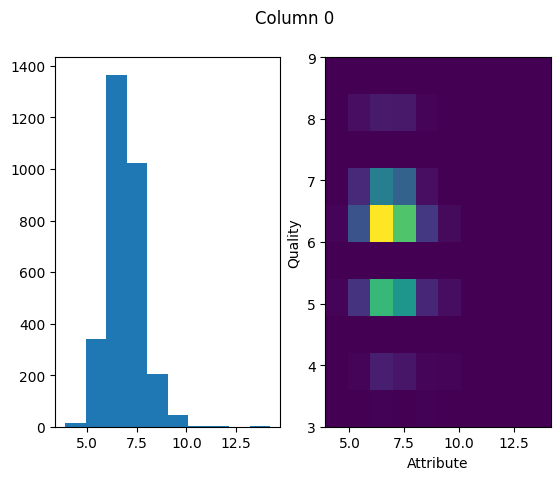

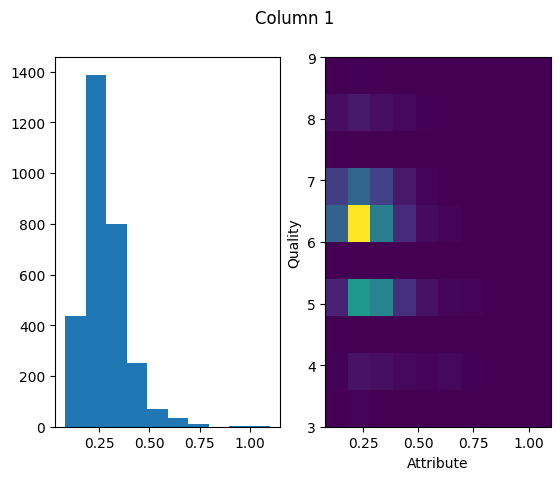

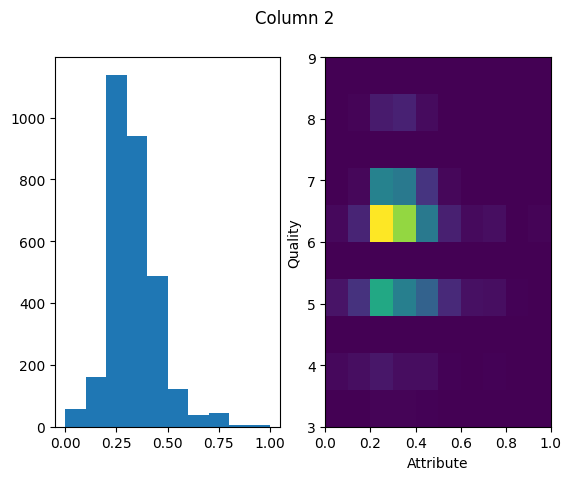

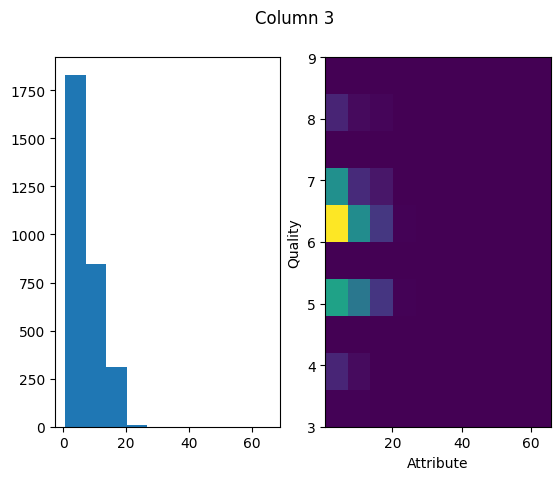

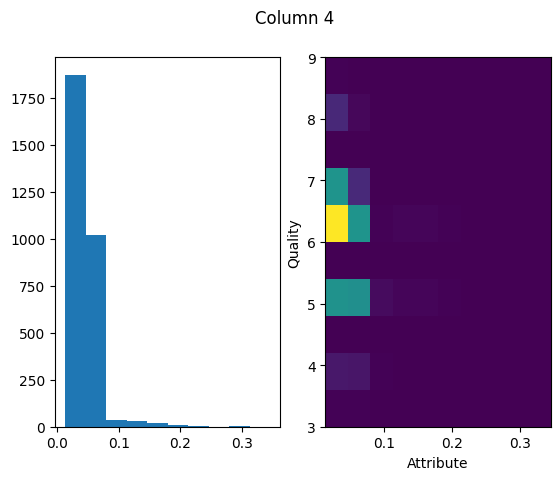

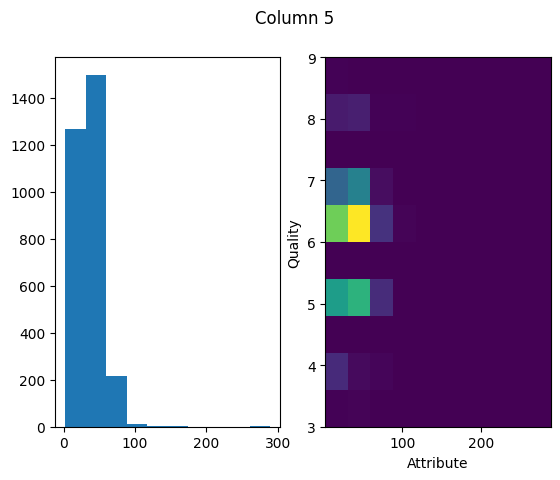

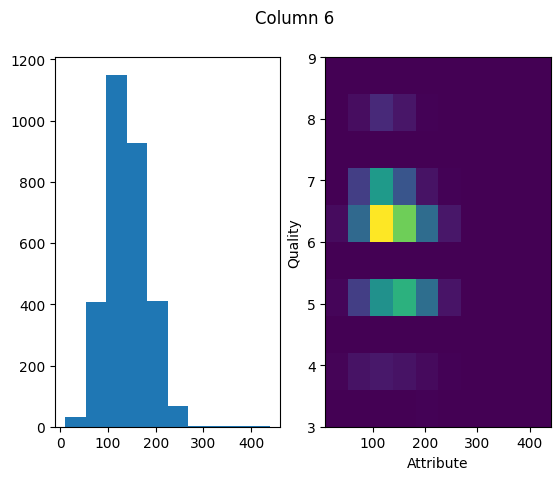

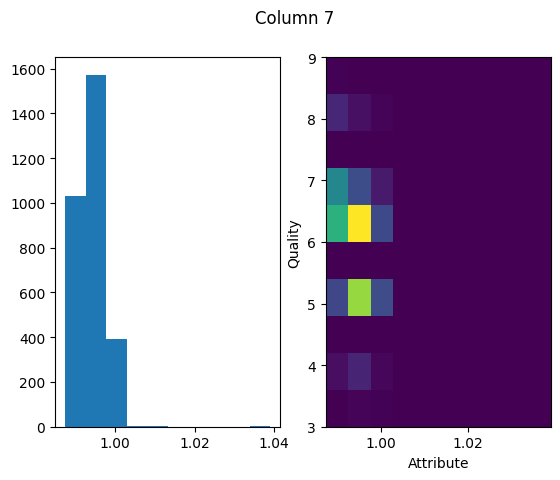

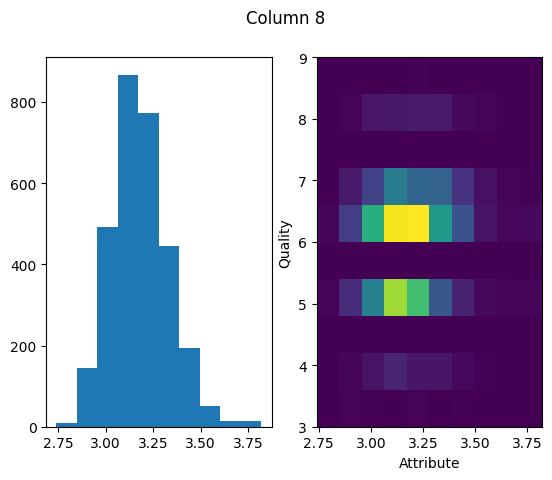

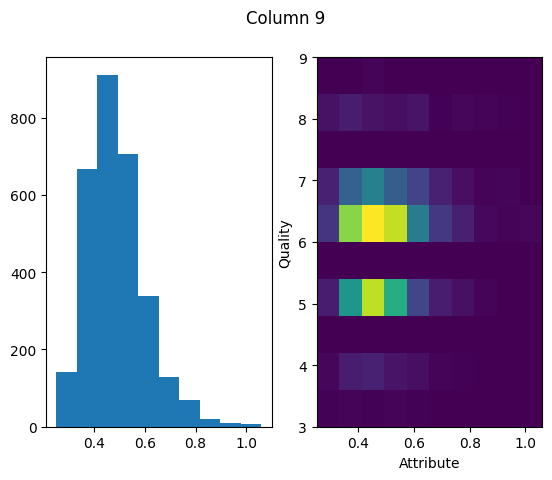

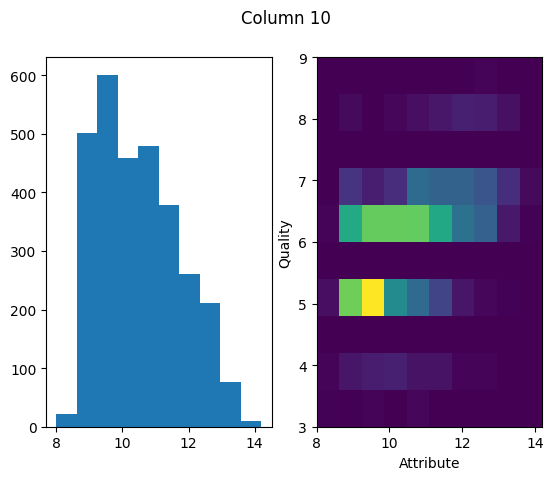

[-0.1074893981182007, -0.22120018160363852, 0.0027741876768342328, -0.09621110136051761, -0.22130728493410667, 0.0028242888136658243, -0.18064149281249253, -0.3060752571836257, 0.10935524631000829, 0.04999678533076868, 0.4430046215130721]


In [31]:
corr_coeffs = []
for n in range(0,11):
  #Plotting distribution for each feature:
  plt.subplot(1, 2, 1)
  plt.hist(X_train[:,n])

  #Plotting the 2D distrubution:
  plt.subplot(1, 2, 2)
  plt.hist2d(X_train[:,n], y_train)
  plt.xlabel('Attribute')
  plt.ylabel('Quality')

  plt.suptitle(f'Column {n}')
  plt.show()

  corr_coeffs.append(np.corrcoef(X_train[:,n], y_train)[0,1])
print(corr_coeffs)




[-4.38031294e-02 -2.03817903e+00  4.14218821e-02  2.45338746e-02
 -1.36011217e+00  4.15202876e-03 -1.08414721e-03  1.83910314e+00
  2.53900752e-01  3.89114599e-01  3.62969946e-01]
The correlation coefficient between predicted and true quality is 0.5023862496064454


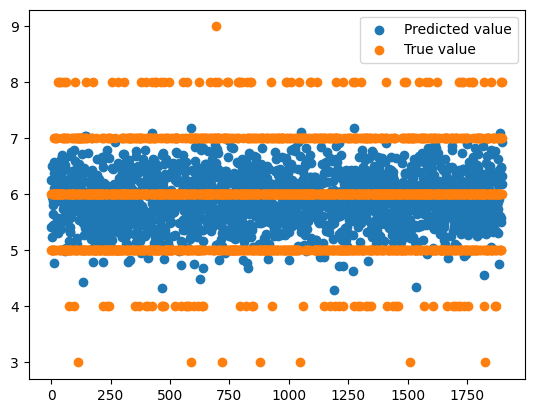

In [49]:
#Calculating the linear regression weights:
W = np.matmul(np.linalg.inv(np.matmul(X_train.T, X_train)),X_train.T)
W = np.matmul(W, y_train)
print(W)


#Predicting data:
y_predicted = np.matmul(X_test, W)
prediction_coeff = np.corrcoef(y_predicted, y_test)[0,1]
print(f'The correlation coefficient between predicted and true quality is {prediction_coeff}')

#Plot
X = [n for n in range(0, len(X_test[:,0]))]


plt.scatter(X, y_predicted, label='Predicted value')
plt.scatter(X, y_test, label = 'True value')
plt.legend()
plt.show()

The attribute that seemed to be the most relevant in predicting the quality was column 10 (alcohol), with a correlation coefficient of 0.44. Many of the attributes had negative correlation coefficients, which seems to point at them not being very relevant at all.

All in all my predictions aren't very good, as can be seen in the last scatterplot and in the correlation coefficient. The model seems to predict that most wines have a quality close to the mean value, which does makes sense but is not very useful.

# Hints

Formally, we want to find weights $w_i$ that minimize:
$$
\sum_{j}\left(\sum_{i} X_{i j} w_{i}-y_{j}\right)^{2}
$$
The index $i$ denotes the different features (properties of the wines) while the index $j$ runs over the different wines. The matrix $X_{ij}$ contains the training data, $y_j$ is the 'true' quality for sample $j$. The weights can be found by taking the first derivative of the above expression with respect to the weights and setting it to zero (the standard strategy for finding an extremum), and solving the corresponding system of equations (for a detailed derivation, see [here](https://en.wikipedia.org/wiki/Ordinary_least_squares)). The result is:
$$
\overrightarrow{\mathbf{w}}=\left(\mathbf{X}^{T} \mathbf{X}\right)^{-1} \mathbf{X}^{T} \overrightarrow{\mathbf{y}}
$$

In the end, you should have as many components of $w_i$ as there are features in the data (i.e. eleven in this case).

You can use `.shape` to inspect the dimensions of numpy tensors.
